In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Optional: Set plot style
sns.set(style='whitegrid')

In [3]:
# Load BrentOilPrices.csv
brent_df = pd.read_csv("../data/BrentOilPrices.csv")

# Convert Date column to datetime (mixed formats allowed)
brent_df['Date'] = pd.to_datetime(brent_df['Date'], errors='coerce')

# Sort by date and reset index
brent_df = brent_df.sort_values('Date').reset_index(drop=True)

# Check for missing values
print("Missing values in Brent data:\n", brent_df.isnull().sum())

# Drop any rows with missing dates or prices
brent_df = brent_df.dropna(subset=['Date', 'Price'])

# Preview
brent_df.head()


C:\Users\ayish\AppData\Local\Temp\ipykernel_3288\3577473519.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  brent_df['Date'] = pd.to_datetime(brent_df['Date'], errors='coerce')


Missing values in Brent data:
 Date     0
Price    0
dtype: int64


,Date,Price
0,1987-05-20,18.63
1,1987-05-21,18.45
2,1987-05-22,18.55
3,1987-05-25,18.60
4,1987-05-26,18.63


In [5]:
# Load OilPriceEvents.csv with correct delimiter and encoding
events_df = pd.read_csv("../data/OilPriceEvents.csv", sep=';', encoding='ISO-8859-1')

# Convert StartDate to datetime format (assuming 'YYYY-MM')
events_df['StartDate'] = pd.to_datetime(events_df['StartDate'], format='%Y-%m', errors='coerce')

# Drop rows with any missing values
events_df = events_df.dropna()

# Preview cleaned events
events_df.head()


,StartDate,Event,Description,Category
0,1987-12-01,OPEC Meeting Failure,"Collapse of pricing accord, downward price pre...",OPEC decision
1,1988-07-01,IranIraq Ceasefire,War ends; supply stabilizes.,Geopolitical
2,1989-03-01,Exxon Valdez Spill,Valdez oil spill disrupts supply sentiment.,Supply disruption
3,1990-08-01,Gulf War (Iraq invades Kuwait),Sharp Brent spike from ~$17?$3646 due to supp...,Geopolitical
4,1991-12-01,Soviet Union Collapse,Disruption of Soviet oil exports and market un...,Economic


In [6]:
print("Brent Oil Data Types:\n", brent_df.dtypes)
print("\nOil Events Data Types:\n", events_df.dtypes)

print("\nBrent Dataset Shape:", brent_df.shape)
print("Events Dataset Shape:", events_df.shape)


Brent Oil Data Types:
 Date     datetime64[ns]
Price           float64
dtype: object

Oil Events Data Types:
 StartDate      datetime64[ns]
Event                  object
Description            object
Category               object
dtype: object

Brent Dataset Shape: (9011, 2)
Events Dataset Shape: (54, 4)


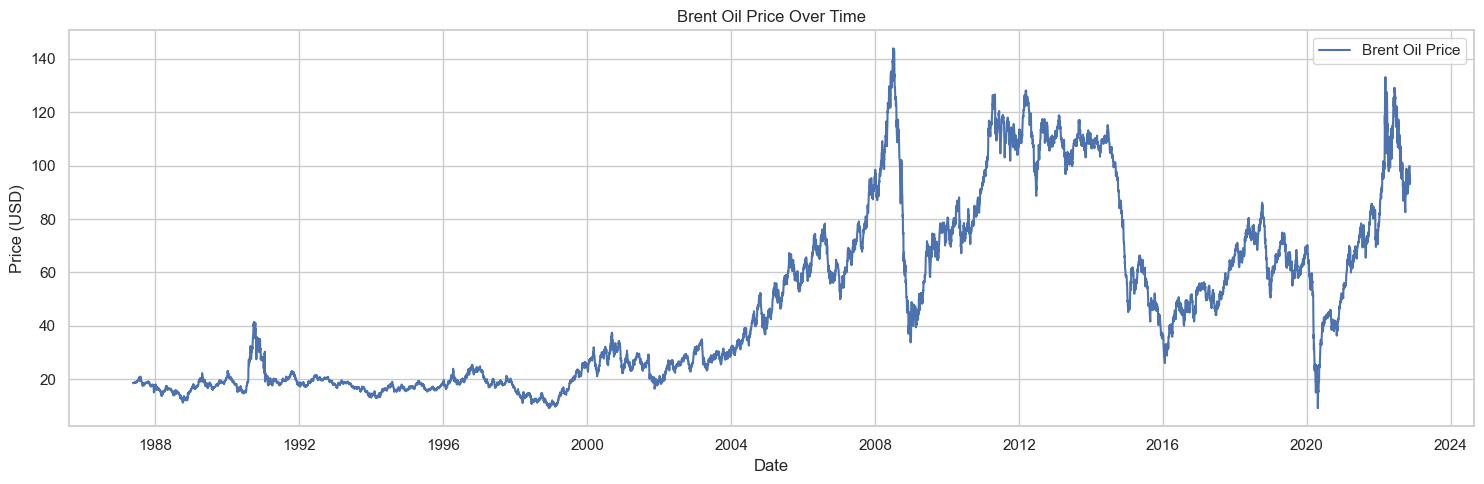

In [7]:
plt.figure(figsize=(15,5))
plt.plot(brent_df['Date'], brent_df['Price'], label='Brent Oil Price')
plt.title('Brent Oil Price Over Time')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()


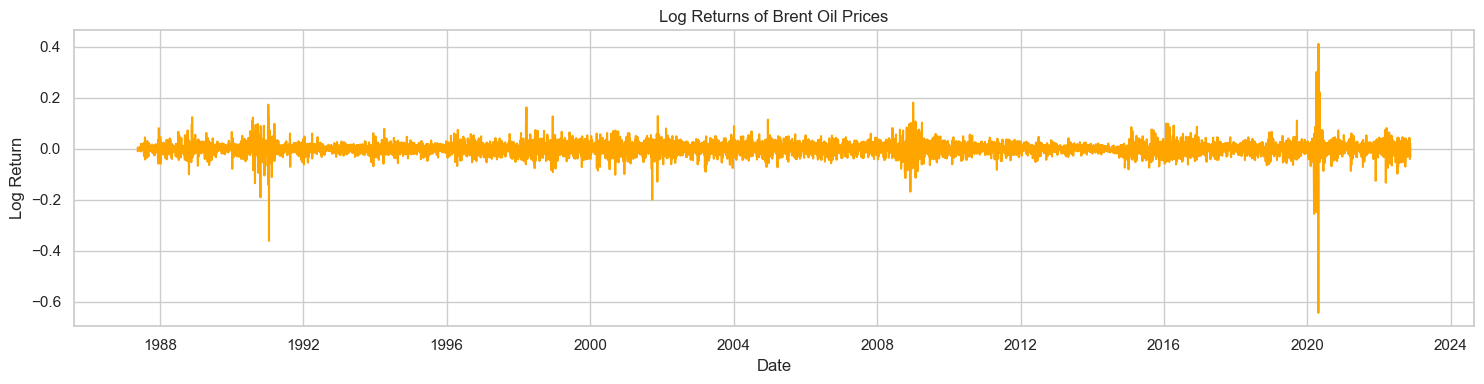

In [8]:
# Compute log returns
brent_df['Log_Returns'] = np.log(brent_df['Price'] / brent_df['Price'].shift(1))
brent_df = brent_df.dropna()

# Plot log returns
plt.figure(figsize=(15,4))
plt.plot(brent_df['Date'], brent_df['Log_Returns'], color='orange')
plt.title('Log Returns of Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.tight_layout()
plt.show()


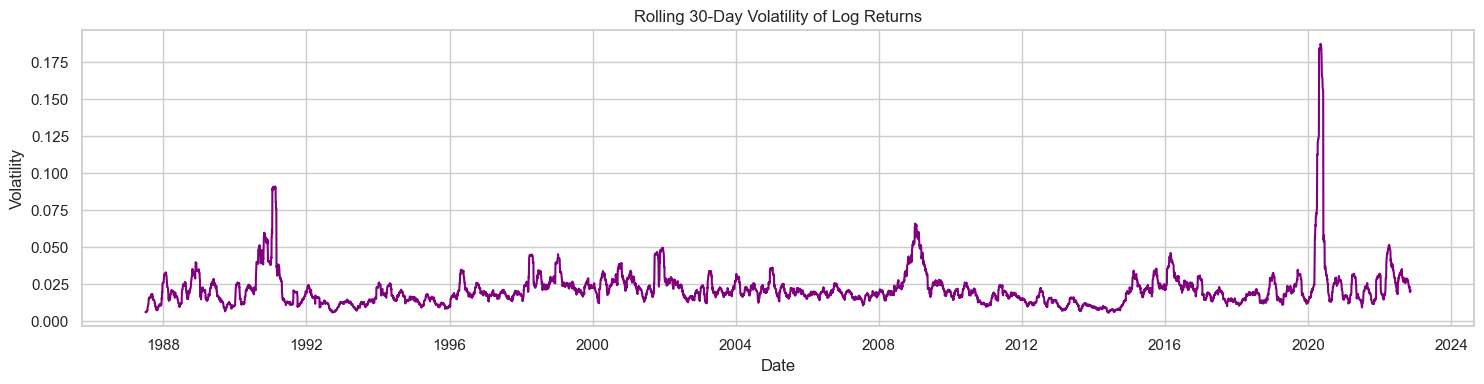

In [9]:
# Calculate rolling 30-day standard deviation
brent_df['Volatility'] = brent_df['Log_Returns'].rolling(window=30).std()

plt.figure(figsize=(15,4))
plt.plot(brent_df['Date'], brent_df['Volatility'], color='purple')
plt.title('Rolling 30-Day Volatility of Log Returns')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.tight_layout()
plt.show()


In [12]:
from statsmodels.tsa.stattools import adfuller

In [14]:
#4. ADF Test – Stationarity of Log Returns
adf_result = adfuller(brent_df['Log_Returns'].dropna())
adf_stat, p_value = adf_result[0], adf_result[1]

print("ADF Statistic:", round(adf_stat, 4))
print("p-value:", round(p_value, 4))

if p_value < 0.05:
    print("✅ The log return series is stationary (p < 0.05)")
else:
    print("⚠️ The log return series may not be stationary (p >= 0.05)")

ADF Statistic: -16.4271
p-value: 0.0
✅ The log return series is stationary (p < 0.05)


In [11]:
#save cleaned data
brent_df.to_csv("../data/BrentOilPrices_Cleaned.csv", index=False)
#  save cleaned events_df
events_df.to_csv("../data/OilPriceEvents_cleaned.csv", index=False)